In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 1: EDA
#We're Going to do the Following:
#1. Clean the data by finding and replacing Null values.
#We are going to fill in the missing volume values with the mean volume of each year.
#We are going to add new columns for INR rate over the years, difference in daily High and Low price, 
#as well as average Daily Price, and others, which we are going to use in visualization/analysis later.

In [3]:
#Open: This refers to the opening price of gold on a specific date
#High: This refers to the highest price at which gold was traded on a specific date.
#Low: This refers to the lowest price at which gold was traded on a specific date.
#DateClose: This refers to the closing price of gold on a specific date. 
#It represents the price at which the last trade for gold occurred on that day.

In [4]:
df= pd.read_csv('gold prices.csv',encoding='unicode_escape')
df.head()
#use unicode escape to avoid encoding error

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7


In [5]:
df.info()
#this function is used to know the information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB


In [6]:
df.describe()
#The df.describe() function is extremely useful for getting a quick summary of our gold price data stored in 
#a Pandas DataFrame named df.
#Here's why it's valuable in this specific case:
#Understanding Gold Price Distribution:
#Gold prices can fluctuate significantly over time. 
#df.describe() helps you understand this distribution by providing various statistics for each column
#(High, Low, Open, Close, Volume).

,Close/Last,Volume,Open,High,Low
count,2539.000000,2511.000000,2539.000000,2539.000000,2539.000000
mean,1467.437456,183765.289128,1467.455967,1477.035880,1457.630721
std,282.891621,98028.942525,283.126968,285.232942,280.366732
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1243.900000,123166.500000,1243.850000,1251.250000,1235.800000
50%,1321.400000,172127.000000,1321.700000,1329.300000,1314.000000
75%,1774.050000,233415.000000,1773.950000,1785.000000,1763.550000
max,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000


In [7]:
null_values =df.isnull().sum()
print(null_values)

Date           0
Close/Last     0
Volume        28
Open           0
High           0
Low            0
dtype: int64


In [8]:
#printing rows with null values
rows_with_null =df.isnull()
df[rows_with_null.any(axis=1)].head(10)

,Date,Close/Last,Volume,Open,High,Low
208,10/18/2022,1655.5,NaN,1655.5,1655.5,1655.5
210,10/14/2022,1672.9,NaN,1672.9,1672.9,1672.9
211,10/13/2022,1672.9,NaN,1672.9,1672.9,1672.9
853,03/27/2020,1623.9,NaN,1623.9,1623.9,1623.9
1191,11/21/2018,1225.8,NaN,1225.8,1225.8,1225.8
1236,09/19/2018,1202.2,NaN,1202.2,1202.2,1202.2
1924,12/25/2015,1075.9,NaN,1075.9,1075.9,1075.9
1945,11/26/2015,1069.7,NaN,1069.7,1069.7,1069.7
2003,09/07/2015,1121.4,NaN,1121.4,1121.4,1121.4
2049,07/03/2015,1163.5,NaN,1163.5,1163.5,1163.5


In [9]:
#lets fill the missing volume values with mean of volume for that specific year
# first, lets turn the date column to proper date-time format and add a new column for year.

In [10]:
df['Date']=pd.to_datetime(df['Date']) #it converts the date to date-time format 
df['Year']=df['Date'].dt.year #it creates a new column in the data frame as Year
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023


In [11]:
missing_volume_rows=df[df['Volume'].isna()]
#calculate the mean of the "volume" for each year
yearly_volume_mean=df.groupby('Year')['Volume'].mean()#.groupby('Year') groups the DataFrame by the "Year" column.
missing_volume_rows, yearly_volume_mean
for year, mean_value in yearly_volume_mean.items():
    df.loc[(df['Year'] == year)&(df['Volume'].isna()),'Volume']=mean_value
null_values = df.isnull().sum()
print(null_values)


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Year          0
dtype: int64


In [12]:
#lets compare the average value of gold over the years

In [13]:
df['Average'] =df[['Open','High','Low','Close/Last']].mean(axis=1)
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Average
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950


In [14]:
#now we will calculate the price difference between high and low prices for each day.
df['Price_Difference']=df['High'] - df['Low']
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325,19.3
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400,16.2
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600,16.8
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000,14.0
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950,10.9


In [15]:
#adding another column for USD to INR rates based on year
inr_list_rev =[56.57,62.33,62.97,66.46,67.79,70.09,70.39,76.38,74.57,81.35,81.94]
inr_list=inr_list_rev[::-1]
inr_list

[81.94, 81.35, 74.57, 76.38, 70.39, 70.09, 67.79, 66.46, 62.97, 62.33, 56.57]

In [19]:
# adding an INR column to the dataframe
df['inr_rate']=[inr_list[2023 - year] if (2023-year)<len(inr_list) else None for year in df['Year']]
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference,inr_rate,usd_in_2013
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325,19.3,81.94,112440.1165
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400,16.2,81.94,112440.1165
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600,16.8,81.94,112440.1165
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000,14.0,81.94,112440.1165
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950,10.9,81.94,112440.1165


In [20]:
#adding an average in INR column to the dataframe
df['avg_gold_in_inr']=df['Average']*df['inr_rate']
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference,inr_rate,usd_in_2013,avg_gold_in_inr
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325,19.3,81.94,112440.1165,157433.3705
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400,16.2,81.94,112440.1165,158176.9760
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600,16.8,81.94,112440.1165,158685.0040
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000,14.0,81.94,112440.1165,159209.4200
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950,10.9,81.94,112440.1165,159533.0830


In [21]:
#now lets assume on the first date of our data, we bought the price 1 ounce of gold in USDs in INR
#lets add another column that lists the value of USD as per changing rate of INR
first_average_price =df.loc[df.index[-1],"Average"]#label-based indexing. 
#It allows you to access a group of rows and columns by labels.
df['usd_in_2013'] = df["inr_rate"]*first_average_price
df.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference,inr_rate,usd_in_2013,avg_gold_in_inr
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325,19.3,81.94,112440.1165,157433.3705
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400,16.2,81.94,112440.1165,158176.9760
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600,16.8,81.94,112440.1165,158685.0040
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000,14.0,81.94,112440.1165,159209.4200
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950,10.9,81.94,112440.1165,159533.0830


In [18]:

df.tail()

,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference,inr_rate,usd_in_2013
2534,2013-08-23,1395.8,149116.0,1376.1,1399.9,1367.8,2013,1384.900,32.1,56.57,77626.76825
2535,2013-08-22,1370.8,134493.0,1365.6,1381.4,1354.5,2013,1368.075,26.9,56.57,77626.76825
2536,2013-08-21,1370.1,137350.0,1371.0,1378.9,1359.2,2013,1369.800,19.7,56.57,77626.76825
2537,2013-08-20,1372.6,130096.0,1364.9,1378.0,1351.6,2013,1366.775,26.4,56.57,77626.76825
2538,2013-08-19,1365.7,116056.0,1377.1,1384.1,1362.0,2013,1372.225,22.1,56.57,77626.76825


In [22]:
#now lets assume that on first day of our data the price of 1 ounce of gold in INR was deposited in bank account
#with a interest of 7% lets calculate a compound interest and add a new column with it
first_rate=df.loc[df.index[-1],"inr_rate"]
principal=first_average_price*first_rate
rate=0.07
df["fd_in_2013"]=principal*(1+rate)**(df["Year"]-2013)
df.head()


,Date,Close/Last,Volume,Open,High,Low,Year,Average,Price_Difference,inr_rate,usd_in_2013,avg_gold_in_inr,fd_in_2013
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023,1921.325,19.3,81.94,112440.1165,157433.3705,152703.602525
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023,1930.400,16.2,81.94,112440.1165,158176.9760,152703.602525
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023,1936.600,16.8,81.94,112440.1165,158685.0040,152703.602525
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023,1943.000,14.0,81.94,112440.1165,159209.4200,152703.602525
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023,1946.950,10.9,81.94,112440.1165,159533.0830,152703.602525


In [44]:
#step 2:VISUALIZATION

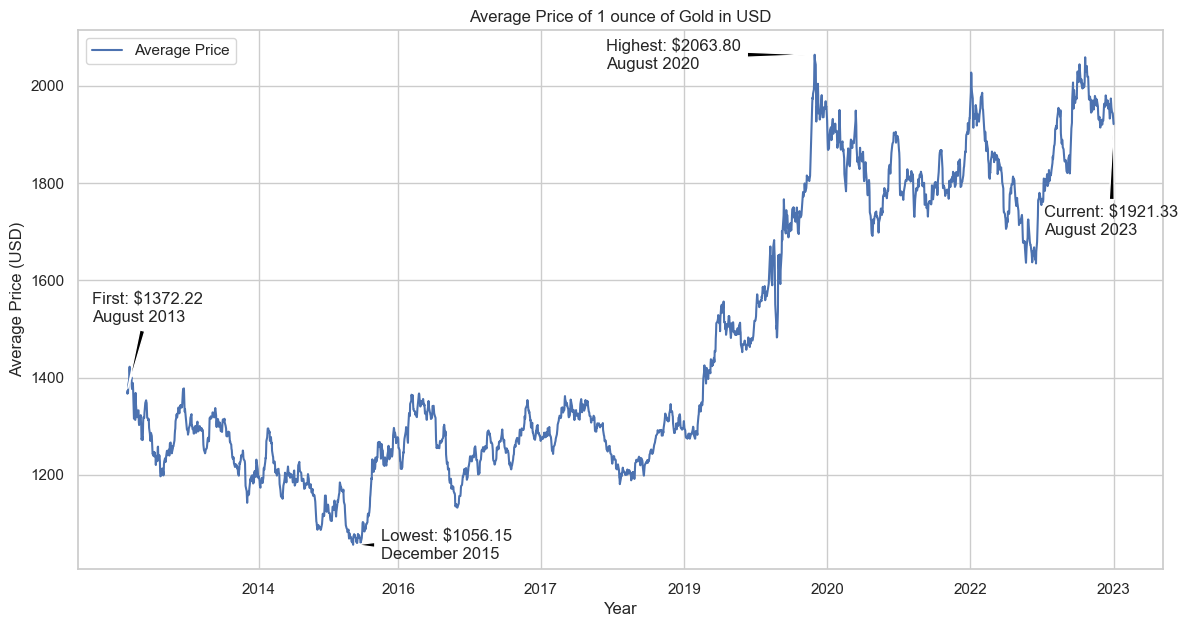

In [45]:
# Plotting the Price of Gold in USD
sns.set(style="whitegrid") 


# Plot the time series graph
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Average'], label='Average Price', color='b')


# Set x-axis to only show the years
plt.gca().set_xticks(df['Date'][::365])
plt.gca().get_xaxis().set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))


# Add titles and labels
plt.title('Average Price of 1 ounce of Gold in USD')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')

# Find the index of the first, current, highest, and lowest points
max_index = df['Average'].idxmax()
min_index = df['Average'].idxmin()
first_index = df.index[-1]  
current_index = df.index[0]


# Annotate the highest value
plt.annotate(f'Highest: ${df["Average"].max():.2f}\n{df["Date"][max_index].strftime("%B %Y")}',
             xy=(df['Date'][max_index], df['Average'].max()),
             xytext=(-150, -10),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the lowest value
plt.annotate(f'Lowest: ${df["Average"].min():.2f}\n{df["Date"][min_index].strftime("%B %Y")}',
             xy=(df['Date'][min_index], df['Average'].min()),
             xytext=(20, -10),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the first point
plt.annotate(f'First: ${df["Average"][first_index]:.2f}\n{df["Date"][first_index].strftime("%B %Y")}',
             xy=(df['Date'][first_index], df['Average'][first_index]),
             xytext=(-25, 50),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the current point
plt.annotate(f'Current: ${df["Average"][current_index]:.2f}\n{df["Date"][current_index].strftime("%B %Y")}',
             xy=(df['Date'][current_index], df['Average'][current_index]),
             xytext=(-50, -80),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Show legend
plt.legend()
# Show the plot
plt.show()

In [46]:
#Plot 1: Average Price of 1 Ounce of Gold in USD
#We observe that Gold bought in 2013 seems to have steadily lost value over the years till December 2015,
#where it had lost about 23% value and traded at the lowest average price in our data. 
#Since 2015, Gold grew steadily in value but didn't reach its initial August 2013
#value till 2019, after which it spiked heavily in value going into 2020, possibly due to the Covid pandemic, and the 
#resulting economic anxiety.
#It reached its peak in August 2020, where its price was at 150% of its value in 2013. 
#Since 2020, the price of gold and see-sawed between USD 1700 and USD 2000, but is currently at a relatively high value 
#of USD 1921

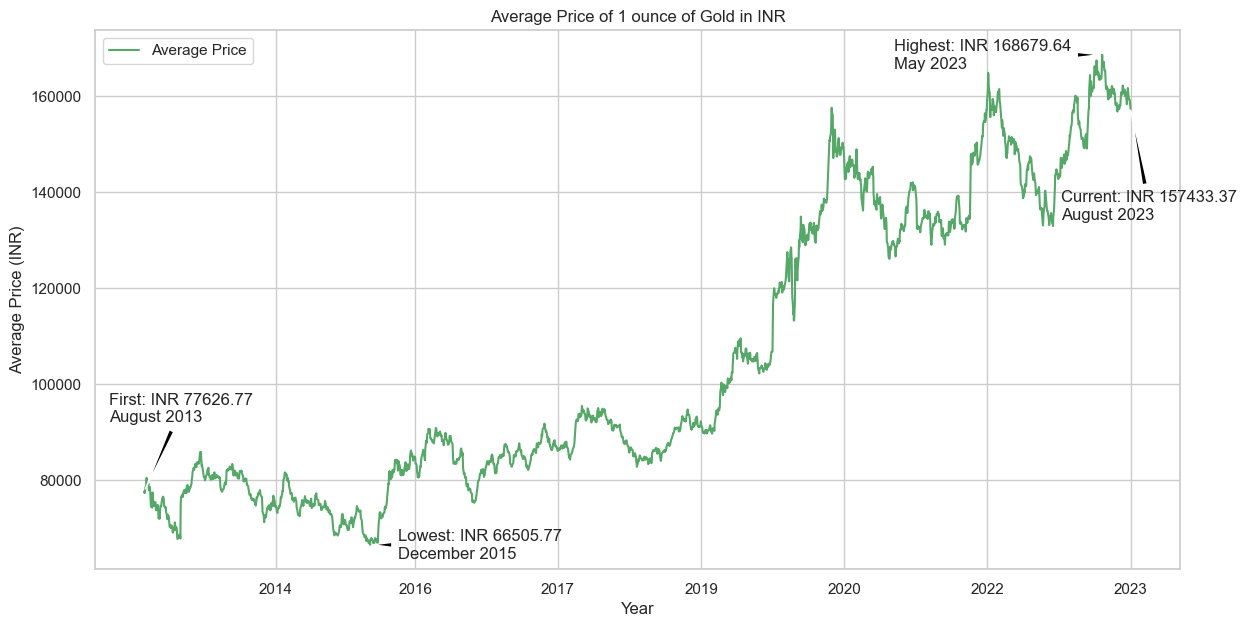

In [47]:
# Plotting the Price of Gold in INR
sns.set(style="whitegrid") 


# Plot the time series graph
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['avg_gold_in_inr'], label='Average Price', color='g')


# Set x-axis to only show the years
plt.gca().set_xticks(df['Date'][::365])
plt.gca().get_xaxis().set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))


# Add titles and labels
plt.title('Average Price of 1 ounce of Gold in INR')
plt.xlabel('Year')
plt.ylabel('Average Price (INR)')

# Find the index of the highest and lowest average prices
max_index = df['avg_gold_in_inr'].idxmax()
min_index = df['avg_gold_in_inr'].idxmin()
first_index = df.index[-1]  
current_index = df.index[0]

# Annotate the highest value
plt.annotate(f'Highest: INR {df["avg_gold_in_inr"].max():.2f}\n{df["Date"][max_index].strftime("%B %Y")}',
             xy=(df['Date'][max_index], df['avg_gold_in_inr'].max()),
             xytext=(-150, -10),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the lowest value
plt.annotate(f'Lowest: INR {df["avg_gold_in_inr"].min():.2f}\n{df["Date"][min_index].strftime("%B %Y")}',
             xy=(df['Date'][min_index], df['avg_gold_in_inr'].min()),
             xytext=(20, -10),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the first point
plt.annotate(f'First: INR {df["avg_gold_in_inr"][first_index]:.2f}\n{df["Date"][first_index].strftime("%B %Y")}',
             xy=(df['Date'][first_index], df['avg_gold_in_inr'][first_index]),
             xytext=(-25, 50),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Annotate the current point
plt.annotate(f'Current: INR {df["avg_gold_in_inr"][current_index]:.2f}\n{df["Date"][current_index].strftime("%B %Y")}',
             xy=(df['Date'][current_index], df['avg_gold_in_inr'][current_index]),
             xytext=(-50, -80),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge'))

# Show legend
plt.legend()
# Show the plot
plt.show()

In [48]:
#Plot 2: Average Price of 1 Ounce of Gold in INR
#When we convert the value of Gold from USD to INR, we see a similar trajectory, with some key differences.
#The lowest price in INR was also in December 2015, however, the loss in INR wasn't as drastic (14% vs 23%).
#This is due to the falling value of the INR as compared to USD.
#In contrast to the USD value, the highest INR value of Gold occured earlier this year in May 2023. 
#This value was 2.17x times the August 2013 value. 
#In other words, the price of Gold increased by 117% from August 2013 to May 2023.

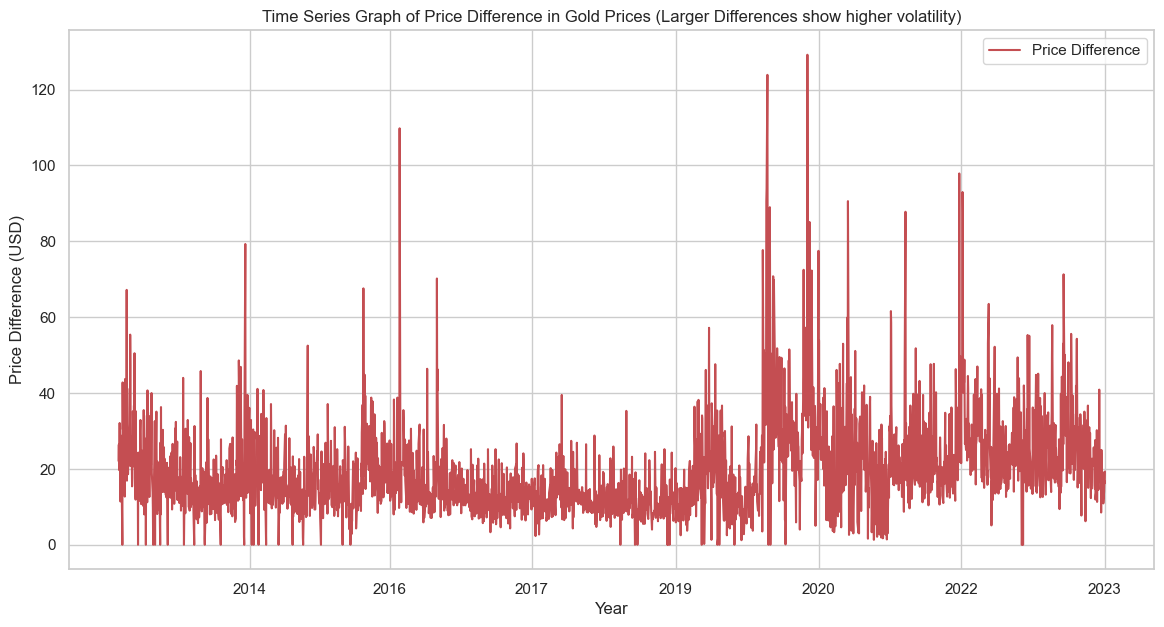

In [49]:
# Plotting Price Differences to show periods of High Volatility
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price_Difference'], label='Price Difference', color='r')

# Set x-axis to only show the years
plt.gca().set_xticks(df['Date'][::365])
plt.gca().get_xaxis().set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Add titles and labels
plt.title('Time Series Graph of Price Difference in Gold Prices (Larger Differences show higher volatility)')
plt.xlabel('Year')
plt.ylabel('Price Difference (USD)')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [50]:
#Plot 3: Time Series of Price Difference (Volatility)¶
#The longer vertical lines indicate a higher price difference, 
#and a frequent occurence of high price difference shows periods of higher volatility. 
#This graph indicates that the period between late 2019 and early 2022 had high volatility, 
#which corresponds with the Covid Pandemic.

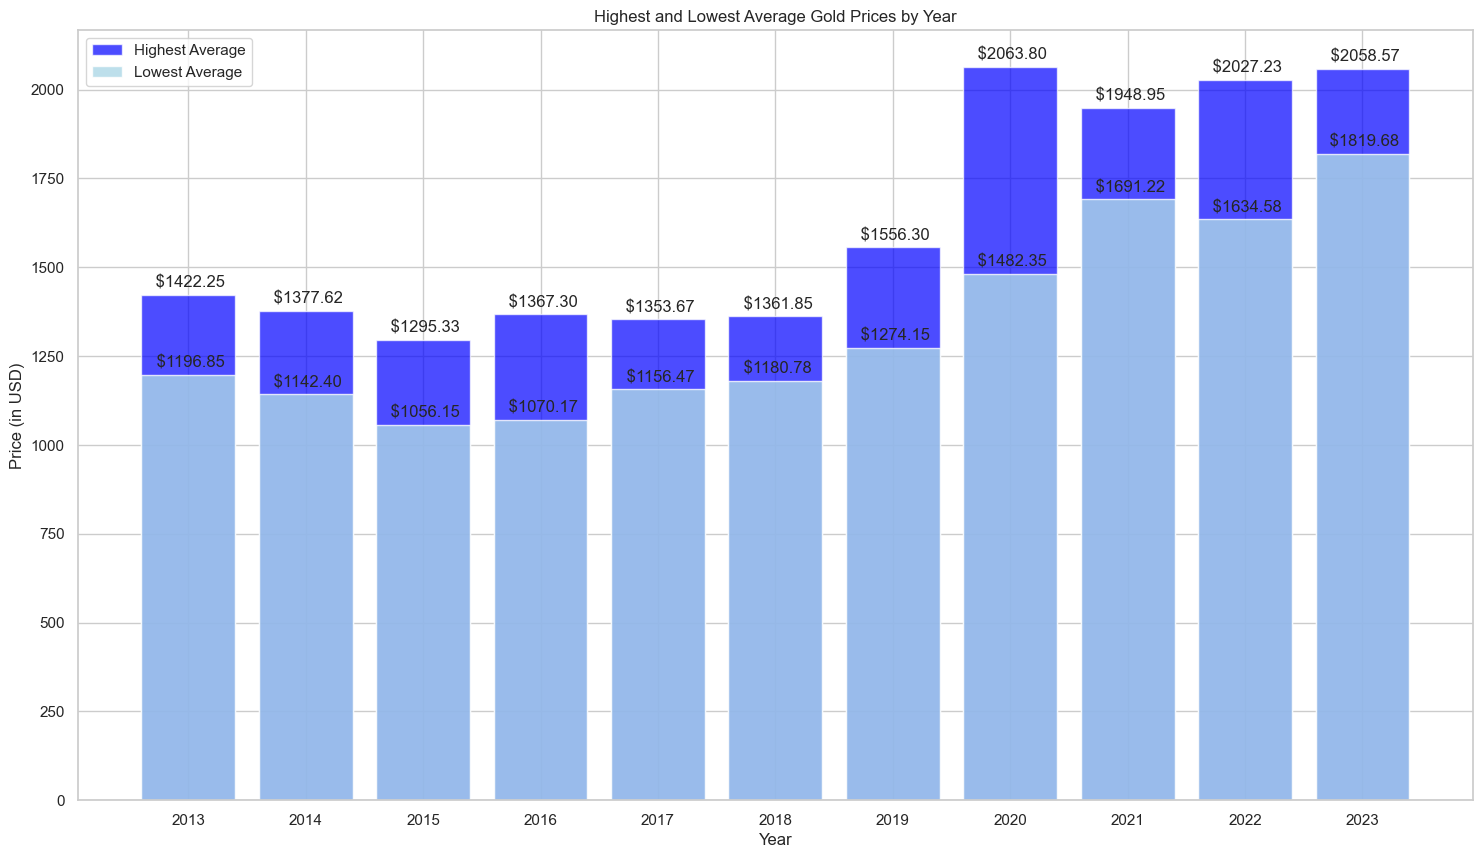

In [51]:
# Find the day with the highest and lowest average for each year
highest_avg_day = df.loc[df.groupby('Year')['Average'].idxmax()]
lowest_avg_day = df.loc[df.groupby('Year')['Average'].idxmin()]



# Extract the month for the highest and lowest average days for annotation
highest_avg_day['Month'] = highest_avg_day['Date'].dt.month.astype(str).str.zfill(2)
lowest_avg_day['Month'] = lowest_avg_day['Date'].dt.month.astype(str).str.zfill(2)


fig, ax = plt.subplots(figsize=(18, 10))
# Create the bars, with the highest average as the back bar and the lowest average as the front bar
bar1 = ax.bar(highest_avg_day['Year'], highest_avg_day['Average'], label='Highest Average', alpha=0.7, color='blue')
bar2 = ax.bar(lowest_avg_day['Year'], lowest_avg_day['Average'], label='Lowest Average', alpha=0.8, color='lightblue')


# Add titles and labels
plt.title('Highest and Lowest Average Gold Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (in USD)')

# Add legend
plt.legend()


def annotate_bars(bar, data_df, position='center'):

    for rect, (year, month, avg) in zip(bar, data_df[['Year', 'Month', 'Average']].itertuples(index=False)):
        height = rect.get_height()
        ax.annotate(f" ${avg:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va=position)


# Annotate bars with tooltips for both highest and lowest average bars
annotate_bars(bar1, highest_avg_day, position='bottom')
annotate_bars(bar2, lowest_avg_day, position='bottom')
ax.set_xticks(highest_avg_day['Year'])

# Show the plot
plt.show()


In [29]:
#Plot 4: Highest and Lowest Average Price per year¶
#This chart shows the highest price gold hit on any single day of each year, as 
#well as the lowest average price Gold hit in that same year

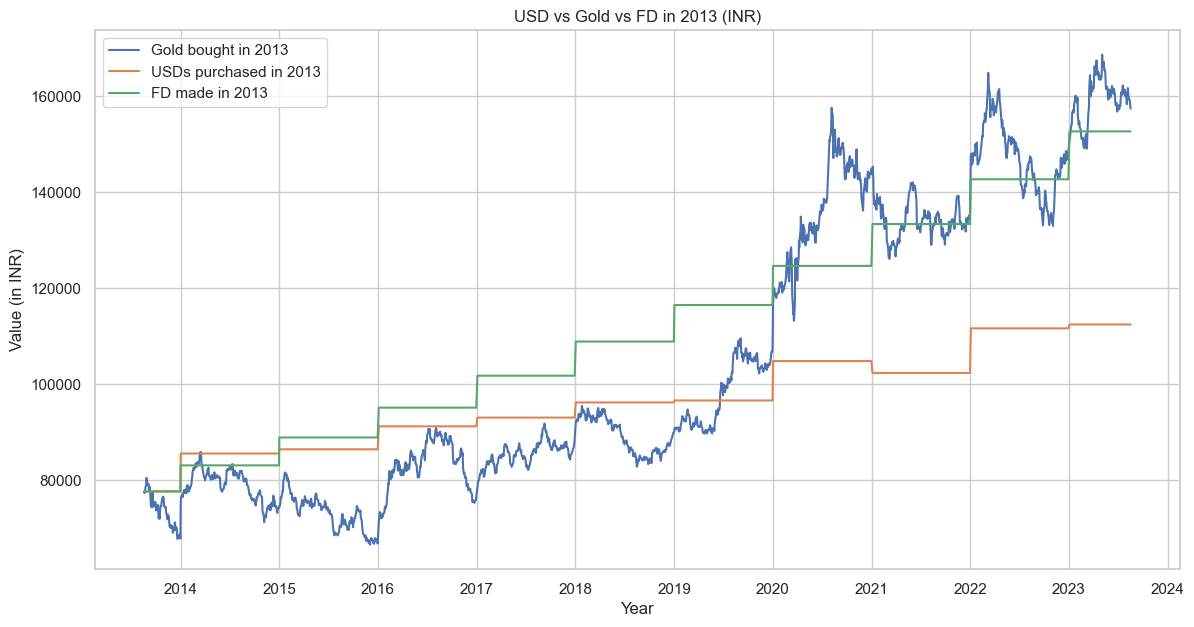

In [30]:
import matplotlib.dates as mdates

# Plotting the Price of Gold in USD
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(14, 7))

# Plot the lines
line1, = ax.plot(df['Date'], df['avg_gold_in_inr'], label='Gold bought in 2013')
line2, = ax.plot(df['Date'], df['usd_in_2013'], label='USDs purchased in 2013')
line2, = ax.plot(df['Date'], df['fd_in_2013'], label='FD made in 2013')


# Set x-axis to only show the years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add titles and labels
plt.title('USD vs Gold vs FD in 2013 (INR)')
plt.xlabel('Year')
plt.ylabel('Value (in INR)')

# Show legend
plt.legend()
# Show the plot
plt.show()

In [31]:
#Plot 5: Value of Gold vs Value of USD vs Value of Fixed Deposit (in INR)
#This chart shows the value of USD 1372.22 worth of INR (Indian Rupees), when used 3 ways in August 2013.
#The first one - the Blue line - is if 1372.22 USD worth of Gold was purchased.
#The second one - the Orange line - shows if INR was used to purchase USD 1372.22 in August 2013.
#And the third - the Green line - denotes a Fixed Deposit of 7% rate Compound Interest made in the same month 
#for the same value.
#The three different lines show the changing value of our investment over the years.
#We can see that the investment in Gold trailed behind the same investment in USD mid-2019, 
#after which the investment in Gold became more profitable. 
#Similarly, investment in the Fixed Deposit account was more profitable than investment in both Gold and USD till 2020. 
#Post-2020 there have been periods where the value of Gold spiked, but also periods 
#where Gold's value dropped below the value of the FD.
#Currently, the value of gold is slightly higher than the amount in the Fixed Deposit account, 
#but significantly higher than the value of 1372 USD in 2023, in terms of Indian Rupees."""

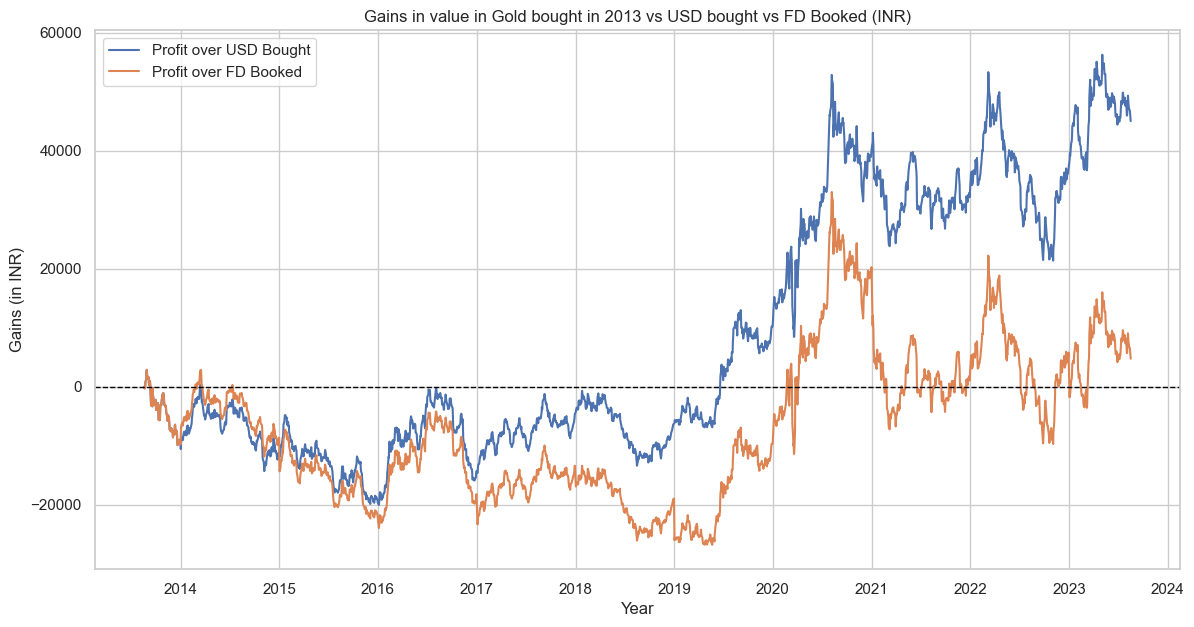

In [32]:
#Plotting the Price of Gold in USD
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(14, 7))

# Plot the lines
line1, = ax.plot(df['Date'], df['avg_gold_in_inr']-df['usd_in_2013'], label='Profit over USD Bought')
line2, = ax.plot(df['Date'], df['avg_gold_in_inr']-df['fd_in_2013'], label='Profit over FD Booked')


# Set x-axis to only show the years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add titles and labels
plt.title('Gains in value in Gold bought in 2013 vs USD bought vs FD Booked (INR)')
plt.xlabel('Year')
plt.ylabel('Gains (in INR)')

plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
# Show legend
plt.legend()
# Show the plot
plt.show()

In [33]:
#Plot 6: Profit/Loss of investment in Gold vs USD and Profit/Loss of Gold vs FD (Represented in INR)
#This chart is similar to the above chart, except it shows the following:
#(Value of Gold purchased in 2013 - Value of USDs purchased in 2013) - The Blue line
#(Value of Gold purchased in 2013 - Value of Fixed Deposit booked in 2013) - The Orange line
#In other words, this shows the profit/loss of gold over USD and FD, expressed in number of rupees.
#When the lines are below 0, it represents loss or that the value of gold is below USD/FD.
#For example, at the start of 2016, we would have a loss of slightly below INR 20,000 if we had invested in Gold in 2013,
#as opposed to investing in USD (Blue line) or a loss slightly higher than INR 20,000 
#if we had invested in Gold over putting the same money in a Fixed Deposit (Orange line).
#However, as we move towards 2024, we notice that our 2013 investment in Gold has become more profitable than our 
#2013 investment in USD.
#And there are periods where the investment in Gold also becomes more profitable than the investment made in the Fixed Deposit.
#To avoid any confusion, this is a reminder that this graph shows
#the difference between the current values of each investment, and not profit over the 2013 value. 
#For example, at the start of 2020, the blue line shows 
#the difference between current value of our 2013 investment of 
#USD 1372 in Gold and the current value of our 2013 investment in USD 1372.

In [13]:
#CONCLUSION:
#USD: While initially, investments in USD might have been more profitable, especially in the early years of the analysis, gold began to outperform USD investments from around mid-2019 onwards.
#Fixed Deposits (FDs): FDs historically provided more stable returns compared to gold until recent years.
#Post-2020, however, there have been periods where gold has offered higher returns, 
#reflecting its attractiveness during uncertain economic conditions.
#Gold has historically been more profitable over the long term compared to USD and FDs,
#especially in terms of capital appreciation.
#USD can provide stability and liquidity but typically does not offer significant profitability through capital appreciation alone.
#FDs are profitable in providing predictable income but may not generate substantial capital gains.
#but by this analysis we can conclude that purchasing gold in INR could be more profitable. and it can also increase
# capital appreciation.